In [1]:
filepath = 'Data\Loan_status_2007-2020Q3.gzip'

In [2]:
# Dependencies

try:
    import os
    import pandas as pd
    import numpy as np
    import scipy as sp
    import matplotlib as mpl
    import matplotlib.pyplot as plt
except Exception as e:
        print(f'a module(s) have not been imported {e}')


In [4]:
# Read the file, takes a long time, so be patient
df = pd.read_csv(filepath)

C:\Users\Tolga\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,48,58,117,127,128,129,132,133,134,137) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df.head(10)

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
5,5,1075269,5000.0,5000.0,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
6,6,1069639,7000.0,7000.0,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
7,7,1072053,3000.0,3000.0,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
8,8,1071795,5600.0,5600.0,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
9,9,1071570,5375.0,5375.0,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [6]:
# Keep only the columns with 'Fully Paid' and 'Charged Off'.

lstatus = ['Fully Paid','Charged Off']
loan_status = df.loc[df["loan_status"].isin(lstatus)]
loan_status.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [7]:
# Count each loan status to see the balance of the data
loan_status["loan_status"].value_counts(normalize=True)

Fully Paid     0.805116
Charged Off    0.194884
Name: loan_status, dtype: float64

In [8]:
missing_fractions = loan_status.isnull().mean().sort_values(ascending=False)
missing_fractions.head(10)

next_pymnt_d               1.000000
hardship_loan_status       0.993182
deferral_term              0.993176
hardship_status            0.993176
hardship_dpd               0.993176
hardship_length            0.993176
payment_plan_start_date    0.993176
hardship_end_date          0.993176
hardship_start_date        0.993176
hardship_type              0.993176
dtype: float64

In [9]:
print(loan_status.columns.tolist())

['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_c

In [10]:
print( loan_status.shape)
print(loan_status.info())

(1860331, 142)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1860331 entries, 0 to 2925492
Columns: 142 entries, Unnamed: 0 to debt_settlement_flag
dtypes: float64(106), int64(1), object(35)
memory usage: 2.0+ GB
None


Text(0, 0.5, 'Count')

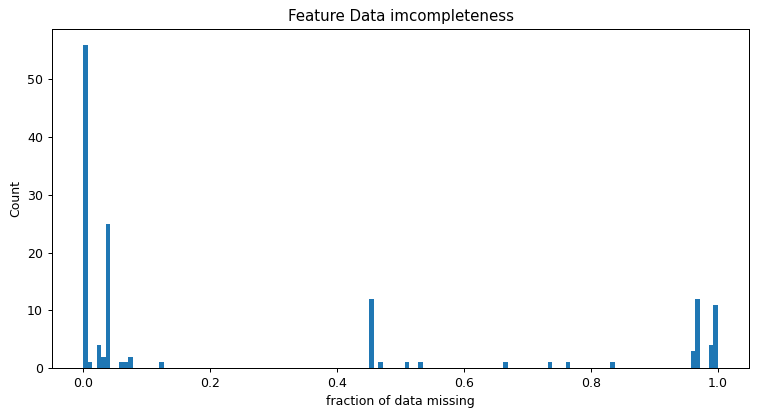

In [11]:
plt.figure( figsize=(10,5), dpi=90)
missing_fractions.plot.hist(bins=142)
plt.title('Feature Data imcompleteness')
plt.xlabel('fraction of data missing')
plt.ylabel('Count')


In [12]:
# Drop columns with missing data
drop_list = sorted(list(missing_fractions[missing_fractions >0.3].index ))
print(drop_list)
print("\n \n Potential Drop features: ", len(drop_list))


['all_util', 'annual_inc_joint', 'deferral_term', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_num_rev_accts', 'sec_app_open_acc', 'sec_app_open_act_il', 'sec_app_

In [13]:
# drop features
loan_status.drop(labels= drop_list, axis=1, inplace=True)
loan_status.shape

C:\Users\Tolga\miniconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(1860331, 93)

In [20]:
df_clean.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,issue_d,...,chargeoff_within_12_mths,mort_acc,num_il_tl,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,5000.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Dec-2011,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,N,N
1,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Dec-2011,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,N,N
2,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Dec-2011,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,N,N
3,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Dec-2011,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,N,N
4,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Dec-2011,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,N,N


In [29]:
cols_keep = ['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership','annual_inc','issue_d','loan_status','pymnt_plan','addr_state','dti','earliest_cr_line','fico_range_low','fico_range_high','open_acc','pub_rec','revol_bal','revol_util','total_acc','total_pymnt','total_rec_late_fee','last_pymnt_d','application_type','acc_now_delinq','tot_coll_amt','tot_cur_bal','chargeoff_within_12_mths','mort_acc','num_il_tl','pub_rec_bankruptcies','tax_liens','tot_hi_cred_lim','total_bal_ex_mort','total_il_high_credit_limit','hardship_flag','debt_settlement_flag']
df_clean = loan_status[cols_keep]
dropped_df = df_clean.dropna()

In [52]:
dropped_df['term'].value_counts()/dropped_df.size*100

 36 months    1.905465
 60 months    0.658638
Name: term, dtype: float64